In [94]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt, patches
from matplotlib.transforms import Bbox
import seaborn as sns
# Counter outil pour effectuer rapidement et facilement des dénombrements.
data = pd.read_csv("results.csv" , sep=',')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Number of Matches per Year

In [95]:

splitted_date = data['date'].str.split('-')
# creating year column
data['year'] = [x[0] for x in splitted_date]
# creating month column
data['month'] = [x[1] for x in splitted_date]
# get the number of matches per year
year_counts = data['year'].value_counts()
year_counts.head()

2019    1155
2008    1091
2011    1081
2004    1064
2000    1026
Name: year, dtype: int64

Text(0.5, 0.98, 'Number of Matches per Year')

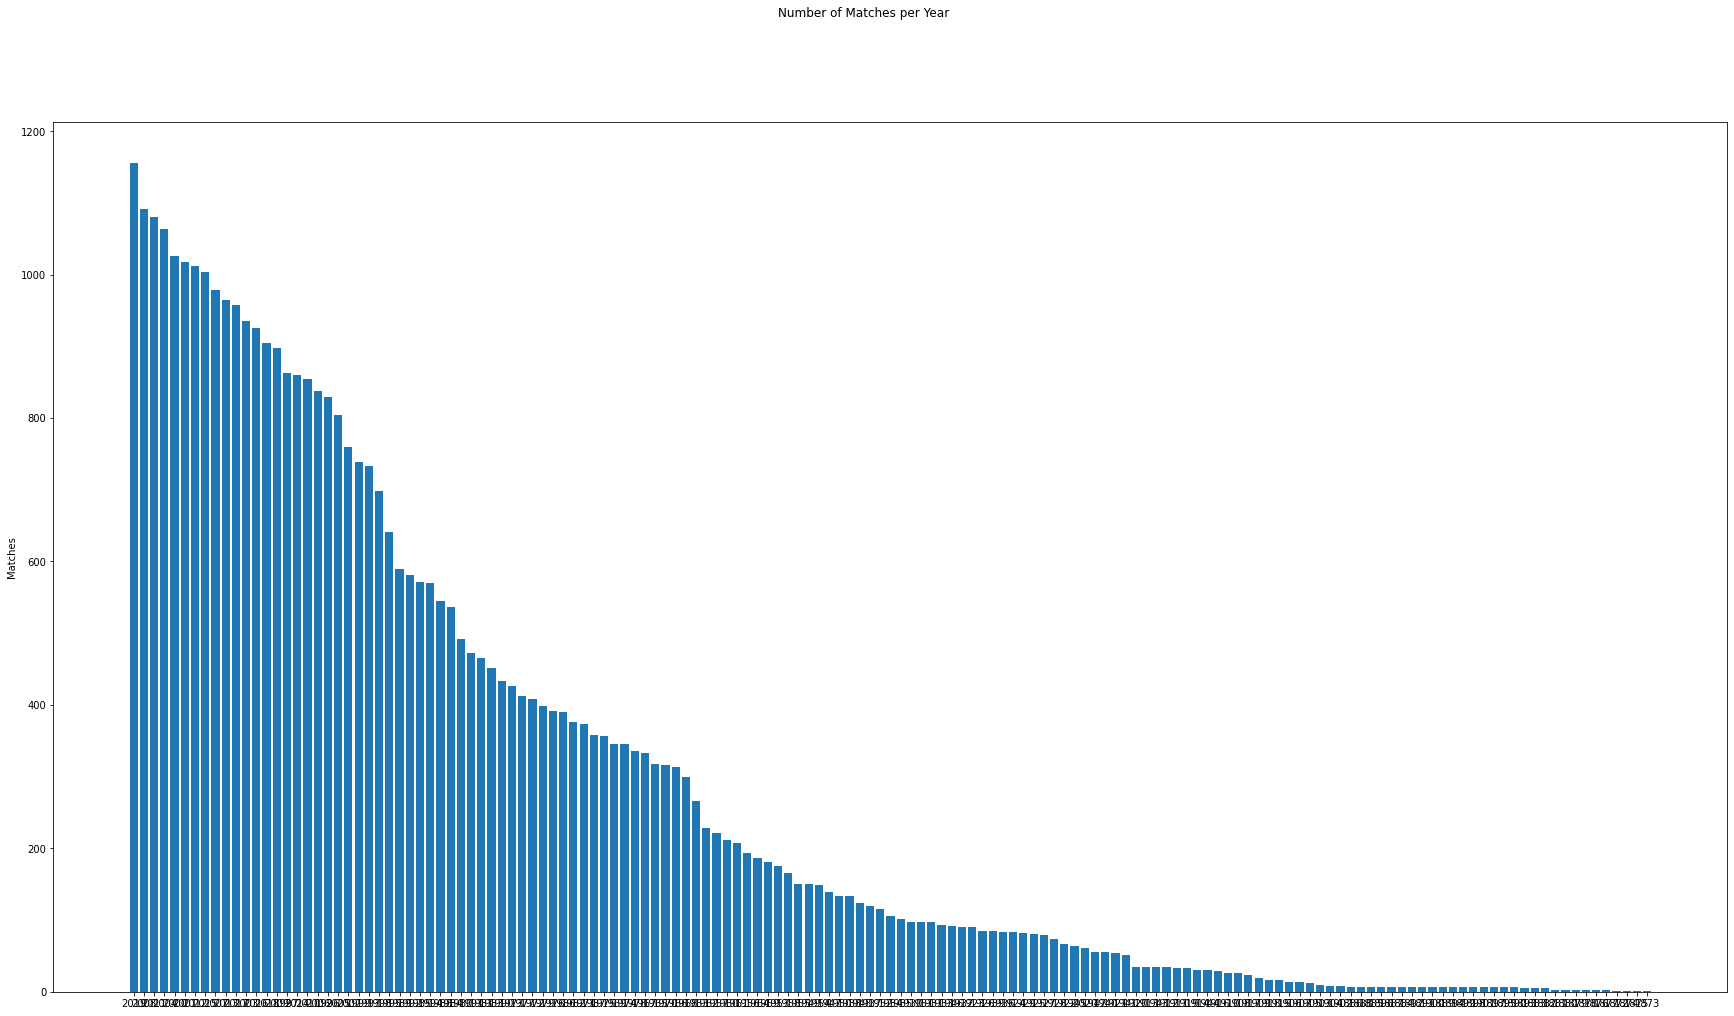

In [96]:
fig, ax = plt.subplots(figsize=(30,16));
ax.bar(year_counts.index, year_counts)
ax.set_ylabel('Matches')
fig.suptitle('Number of Matches per Year')

In [97]:
# find the years with the largest and the smallest number of matches
year_counts.sort_values(ascending=False).iloc[[0, -1]]

2019    1155
1873       1
Name: year, dtype: int64

# Number of matches in each month of the year

In [98]:
# get the number of matches in each month of the year
month_counts = data['month'].value_counts()
# find the months with the largest and the smallest number of matches
month_counts.sort_values(ascending=False).iloc[[0, -1]]

06    5969
01    2218
Name: month, dtype: int64

Text(0.5, 0.98, 'Number of Matches per Month')

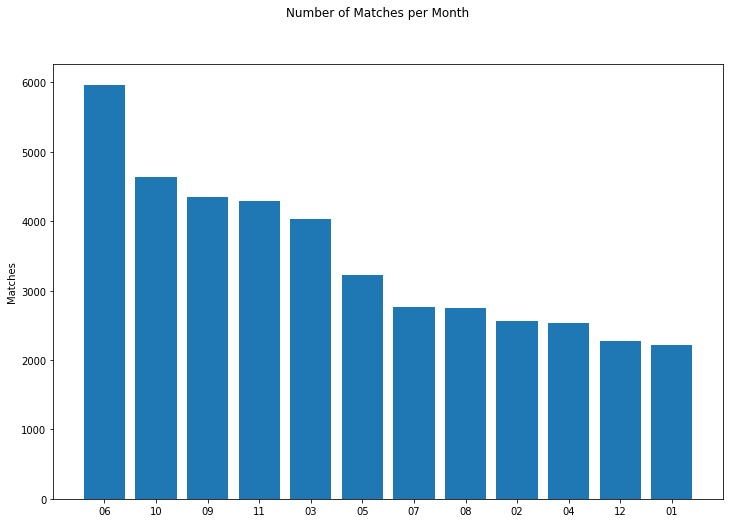

In [99]:
fig, ax = plt.subplots(figsize=(12,8));
ax.bar(month_counts.index, month_counts)
ax.set_ylabel('Matches')
fig.suptitle('Number of Matches per Month')

# Number of Goals per Year

In [100]:
# create a new column 
data['total_goals'] = data['home_score'] + data['away_score']
# game with the largest score
data[data['total_goals'] == data['total_goals'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals
23796,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,04,31


In [101]:
year_goals = data.groupby('year')['total_goals'].sum()
year_goals.sort_values(ascending=False).head()

year
2019    3318
2001    3101
2004    3098
2011    2980
2008    2950
Name: total_goals, dtype: int64

Text(0.5, 0.98, 'Number of Goals per Year')

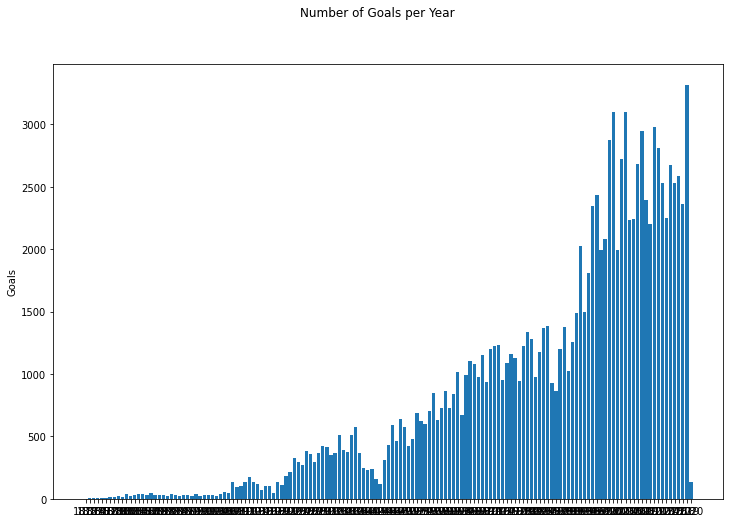

In [102]:
fig, ax = plt.subplots(figsize=(12,8));
ax.bar(year_goals.index, year_goals)
ax.set_ylabel('Goals')
fig.suptitle('Number of Goals per Year')

# Teams that played the Largest Number of Matches

In [153]:
tournaments = ['Friendly', 'FIFA World Cup', 'UEFA Euro', 'African Cup of Nations', 'CFU Caribbean Cup', 
                           'Copa América', 'AFC Asian Cup', 'Other']
cdf1 = data[['home_team', 'tournament']].rename(columns={'home_team': 'team'})
cdf2 = data[['away_team', 'tournament']].rename(columns={'away_team': 'team'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf['count'] = 1
cdf_piv = cdf.pivot_table(values='count', index='team', columns='tournament', aggfunc=np.sum, fill_value=0)
tournament_counts = cdf['tournament'].value_counts(sort=True, ascending=False)
teams = data['home_team'].append(data['away_team'], ignore_index=True)
team_counts = teams.value_counts().sort_values(ascending=False).iloc[:20];
team_counts.head()

Sweden       1020
England      1011
Brazil        981
Argentina     980
Germany       951
dtype: int64

Text(0.5, 0.98, 'Number of Games per Team')

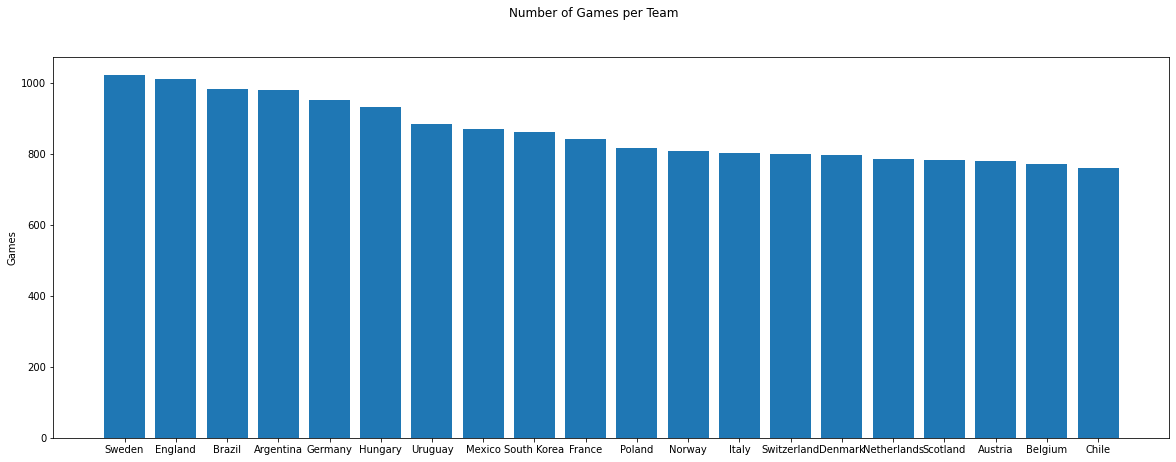

In [154]:
fig, ax = plt.subplots(figsize=(20,7));
ax.bar(team_counts.index, team_counts)
ax.set_ylabel('Games')
fig.suptitle('Number of Games per Team')

# Teams that scored the largest number of goals

In [105]:
cdf1 = data[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'score'})
cdf2 = data[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'score'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf = cdf.groupby('team').sum().sort_values(by='score', axis=0, ascending=False).head(20)
cdf.head()

,score
team,
England,2209
Brazil,2149
Germany,2126
Sweden,2015
Hungary,1889


Text(0.5, 0.98, 'Number of Goals per Team')

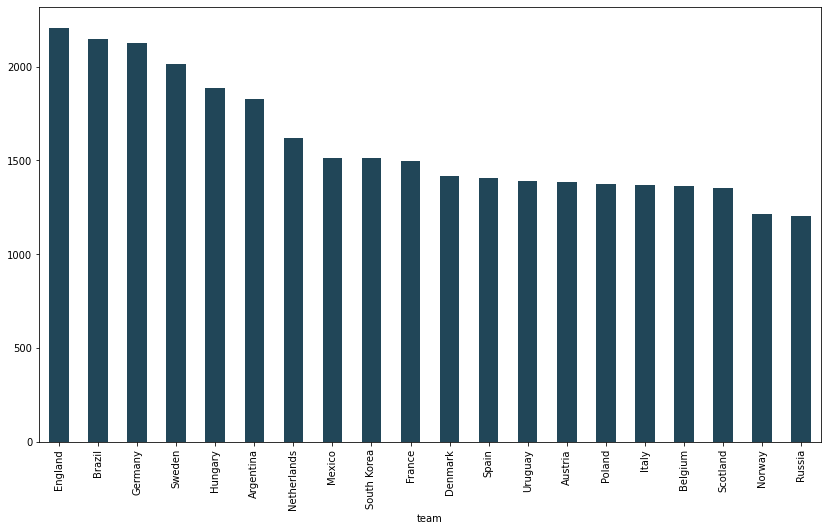

In [106]:
ax = cdf.plot(kind='bar', figsize=(14,8), color='#214658', legend=False);
fig.suptitle('Number of Goals per Team')

# Team that scored the largest number of goals in a WC

In [107]:
cdf1 = data[data['tournament'] == 'FIFA World Cup'][['home_team', 'home_score']].rename(
    columns={'home_team': 'team', 'home_score': 'score'})
cdf2 = data[data['tournament'] == 'FIFA World Cup'][['away_team', 'away_score']].rename(
    columns={'away_team': 'team', 'away_score': 'score'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf = cdf.groupby('team').sum().sort_values(by='score', axis=0, ascending=False).head(20)
display(cdf.head())

,score
team,
Brazil,229
Germany,226
Argentina,137
Italy,128
France,120


Text(0.5, 0.98, 'Number of Goals per Team in WC')

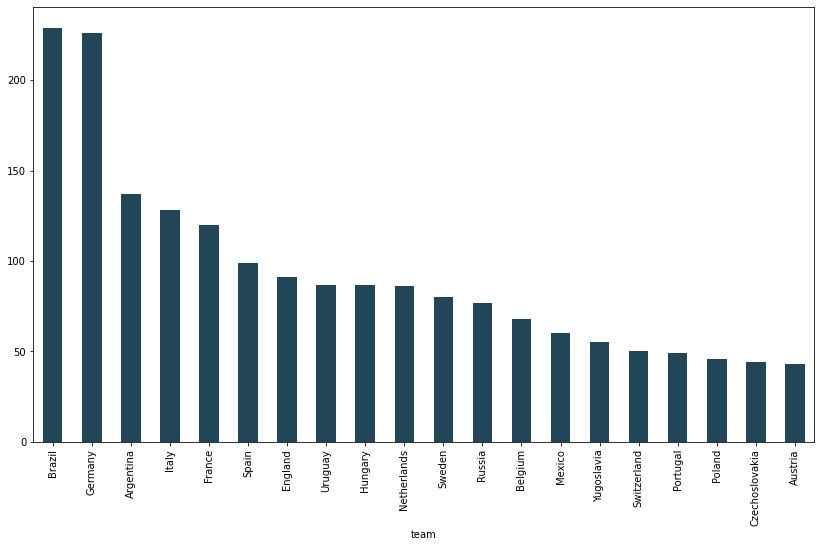

In [108]:
ax = cdf.plot(kind='bar', figsize=(14,8), color='#214658', legend=False);
fig.suptitle('Number of Goals per Team in WC')

#  Teams that played against each other the most

In [109]:
teams = []
for i in range(data.shape[0]):
    tuple_teams = [data.loc[i, 'home_team'], data.loc[i, 'away_team']]
    tuple_teams.sort()
    teams.append(tuple(tuple_teams))
common_two_teams = Counter(teams).most_common(20)
common_two_teams = [(' VS '.join(a), b) for a,b in common_two_teams]
common_two_teams = pd.DataFrame(common_two_teams, columns=['Teams', 'No. of matches'])
common_two_teams.head()

,Teams,No. of matches
0,Argentina VS Uruguay,176
1,Austria VS Hungary,133
2,Belgium VS Netherlands,125
3,England VS Scotland,116
4,Norway VS Sweden,107


In [141]:
common_two_teams_sorted = common_two_teams.sort_values(by='No. of matches', ascending=True)
common_two_teams_sorted

,Teams,No. of matches
19,Brazil VS Paraguay,78
18,Chile VS Uruguay,78
17,Chile VS Peru,79
16,Denmark VS Norway,85
15,Argentina VS Chile,88
14,Finland VS Sweden,89
13,Northern Ireland VS Wales,94
12,Northern Ireland VS Scotland,95
11,England VS Northern Ireland,99
10,Argentina VS Paraguay,101


<AxesSubplot:ylabel='Teams'>

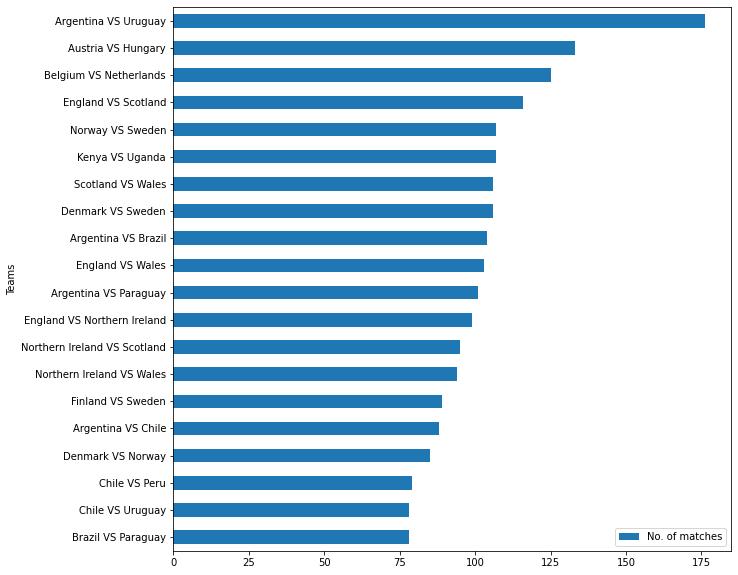

In [144]:
common_two_teams_sorted.plot.barh('Teams', 'No. of matches', figsize=(10,10)) 

Text(0.5, 0.98, 'Number of Games')

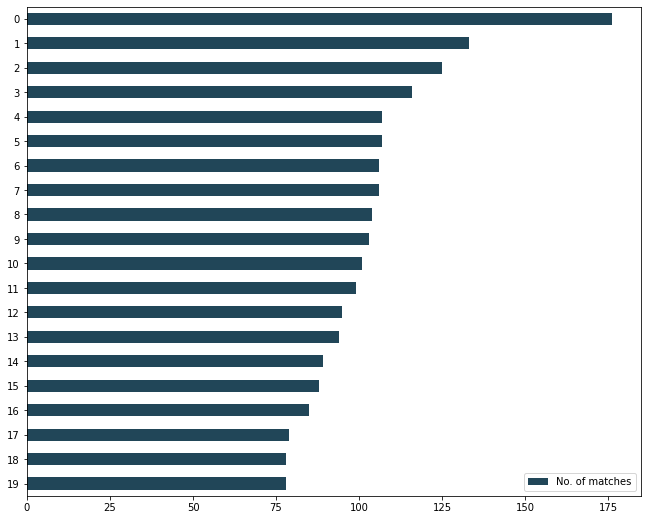

In [110]:
ax = common_two_teams.sort_values(by='No. of matches', ascending=True).plot(kind='barh', figsize=(11,9),
                                                                                color='#214658')
ax.
fig.suptitle('Number of Games')

# Team that won the Largest Number of Matches

In [111]:
def getMatchScore(scores):
    if scores['home_score'] > scores['away_score']:
        return 'home_win'
    elif scores['home_score'] == scores['away_score']:
        return 'draw'
    else:
        return 'away_win'

data['result'] = data[['home_score', 'away_score']].apply(getMatchScore, axis=1)

def getWinner(s):
    if s['result'] == 'draw':
        return 'draw'
    elif s['result'] == 'home_win':
        return s['home_team']
    else:
        return s['away_team']
        
data['winner'] = data[['home_team', 'away_team', 'result']].apply(getWinner, axis=1)
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals,result,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,6,home_win,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,3,home_win,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,4,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,3,home_win,Scotland


Text(0.5, 0.98, 'Number of Wins per Team')

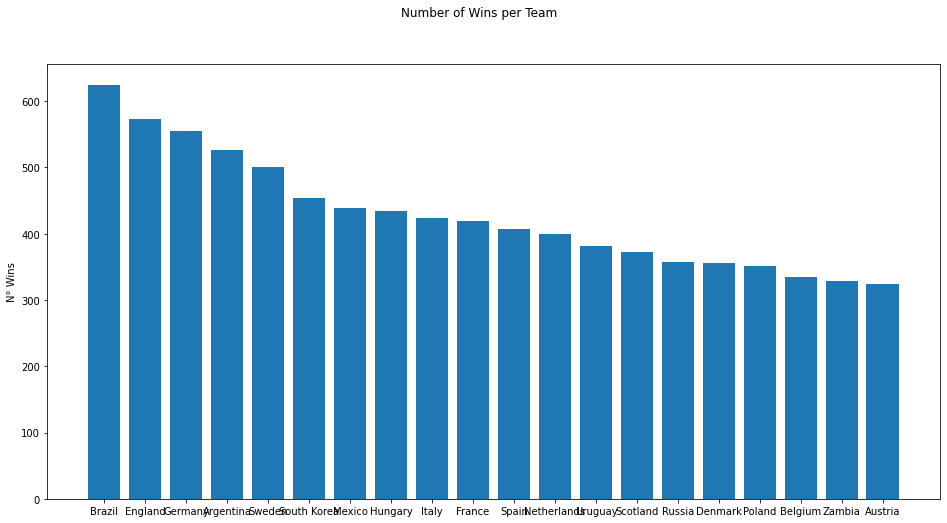

In [112]:
cdf = data[data.winner != 'draw']
winner_counts = cdf.winner.value_counts().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(16,8));
ax.bar(winner_counts.index, winner_counts)
ax.set_ylabel('N° Wins')
fig.suptitle('Number of Wins per Team')

# Teams that lost the Largest Number of Matches

In [113]:
def getLoser(s):
    if s['result'] == 'draw':
        return 'draw'
    elif s['result'] == 'home_win':
        return s['away_team']
    else:
        return s['home_team']
        
data['loser'] = data[['home_team', 'away_team', 'result']].apply(getLoser, axis=1)
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals,result,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,draw,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,6,home_win,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,3,home_win,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,4,draw,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,3,home_win,Scotland,England


Text(0.5, 0.98, 'Number of defeats per Team')

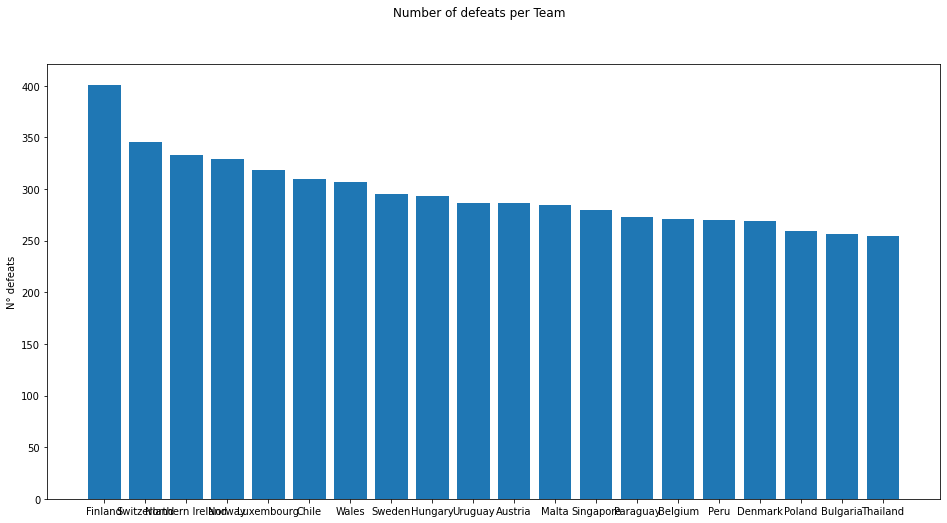

In [114]:
cdf = data[data.loser != 'draw']
loser_counts = cdf.loser.value_counts().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(16,8));
ax.bar(loser_counts.index, loser_counts)
ax.set_ylabel('N° defeats')
fig.suptitle('Number of defeats per Team')

# Percentage of Matches that Ended in a Draw

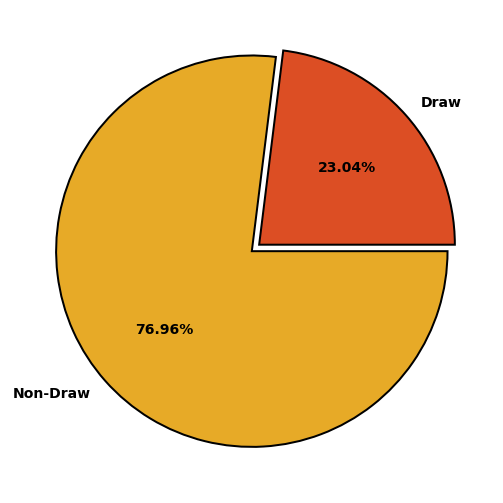

In [115]:
draw_perc = data[data.result == 'draw'].shape[0] / data.shape[0]
fig, ax = plt.subplots(figsize=(14, 9))
ax.pie([draw_perc, 1-draw_perc], explode=[0.05, 0], labels=['Draw', 'Non-Draw'], autopct='%.2f%%', 
       colors=['#dc4e24', '#e7aa27'], textprops={'fontsize':14, 'fontweight':'bold'}, 
       wedgeprops={'linewidth': 2, 'edgecolor': 'black'});

# Goals in Friendly Matches VS Non-Friendly Matches

In [134]:
fr_goals = data[data['tournament'] == 'Friendly']['total_goals'].sum()
fr_count = data[data['tournament'] == 'Friendly']['total_goals'].shape[0]
fr_avg_goals = fr_goals / fr_count

In [135]:
nonfr_goals = data[data['tournament'] != 'Friendly']['total_goals'].sum()
nonfr_count = data[data['tournament'] != 'Friendly']['total_goals'].shape[0]
nonfr_avg_goals = nonfr_goals / nonfr_count

Text(0.5, 0.98, 'Number of defeats per Team')

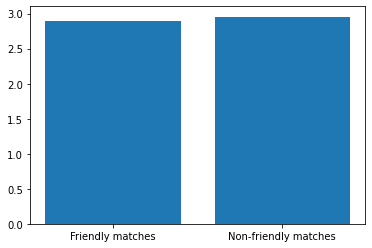

In [150]:
xvalues = max(nonfr_avg_goals,fr_avg_goals)
# fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(x = ['Friendly matches', 'Non-friendly matches'], height = [fr_avg_goals, nonfr_avg_goals])
fig.suptitle('Number of defeats per Team')

# Tournament with More Goals

In [168]:
cdf = data[['tournament', 'total_goals']].copy()
tournamentMatches = cdf.groupby('tournament')['total_goals'].count()
pd.DataFrame(tournamentMatches).rename(columns={'total_goals': 'games_number'})

,games_number
tournament,
ABCS Tournament,20
AFC Asian Cup,370
AFC Asian Cup qualification,724
AFC Challenge Cup,100
AFC Challenge Cup qualification,92
...,...
Viva World Cup,56
WAFF Championship,97
West African Cup,54


In [169]:
cdf2 = pd.DataFrame(data.groupby('tournament')['total_goals'].sum().sort_values(ascending=False).head(10).sort_values())
pd.DataFrame(cdf2)

,total_goals
tournament,
Merdeka Tournament,1681
British Championship,1778
CFU Caribbean Cup qualification,2125
AFC Asian Cup qualification,2419
FIFA World Cup,2548
Copa América,2606
African Cup of Nations qualification,3982
UEFA Euro qualification,7306
FIFA World Cup qualification,20893


In [170]:
# calculate average of goals per match in a tournament 
cdf2['avg_goals'] = 0
for i in range(cdf2.shape[0]):
    temp = cdf2.index[i]
    mc = tournamentMatches.loc[temp, 'games_number']
    cdf2.iloc[i, 1] = cdf2.iloc[i, 0] / mc
cdf2.sort_values(by='avg_goals', inplace=True)
cdf2.head()

IndexingError: Too many indexers